In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import tensorflow.keras as keras

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler


from sklearn.metrics import mean_squared_error
import os
import datetime

####1
Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 

In [58]:
df = pd.read_csv('airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [59]:
scaler = StandardScaler()
df['Passengers'] = scaler.fit_transform(df['Passengers'].values.reshape(-1, 1))
df.head()

,Month,Passengers
0,1949-01,-1.407779
1,1949-02,-1.357590
2,1949-03,-1.240483
3,1949-04,-1.265578
4,1949-05,-1.332496


In [60]:
def create_dataset(df, xLen, bias=10, future=1, present=0.33):
  global ytest
  train_dataset = df[:round(len(df)*(1-present))-1]
  test_dataset = df[round(len(df)*(1-present)) + bias:]

  xtrain = train_dataset[:-future-xLen+1]
  ytrain = train_dataset[future+xLen-1:]

  xtest = test_dataset[:-future-xLen+1]
  ytest = test_dataset[future+xLen-1:]

  dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xtrain,
    ytrain,
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=4,
  )
  dataset_test = keras.preprocessing.timeseries_dataset_from_array(
      xtest,
      ytest,
      sequence_length=xLen,
      sampling_rate=1,
      batch_size=4,
  )

  return dataset_train, dataset_test

In [61]:
xLen = 6

dataset_train, dataset_test = create_dataset(df['Passengers'], xLen)

In [62]:
logdir = os.path.join("logs2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = TensorBoard( logdir, histogram_freq=1)

callbaсk = EarlyStopping(monitor='val_mae', patience=3)

In [63]:
model = Sequential()

model.add(LSTM(64, input_shape = (xLen, 1), return_sequences="True"))

model.add(Flatten())                          
model.add(Dense(32, activation="linear"))      

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_test,
    callbacks=[callbaсk, tensorboard_callback])

loss_1, score_1 = model.evaluate(dataset_test, verbose=0)

Epoch 1/50
21/21 [==============================] - 3s 40ms/step - loss: 0.2783 - mae: 0.4281 - val_loss: 0.6213 - val_mae: 0.6729
Epoch 2/50
21/21 [==============================] - 0s 13ms/step - loss: 0.0808 - mae: 0.2321 - val_loss: 0.6869 - val_mae: 0.6603
Epoch 3/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1055 - mae: 0.2709 - val_loss: 0.5676 - val_mae: 0.6347
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0790 - mae: 0.2294 - val_loss: 0.6063 - val_mae: 0.6256
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0904 - mae: 0.2484 - val_loss: 0.5395 - val_mae: 0.6038
Epoch 6/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0764 - mae: 0.2242 - val_loss: 0.5551 - val_mae: 0.5958
Epoch 7/50
21/21 [==============================] - 0s 13ms/step - loss: 0.0796 - mae: 0.2293 - val_loss: 0.5241 - val_mae: 0.5807
Epoch 8/50
21/21 [==============================] - 0s 13ms/step - loss: 0.0733 - m

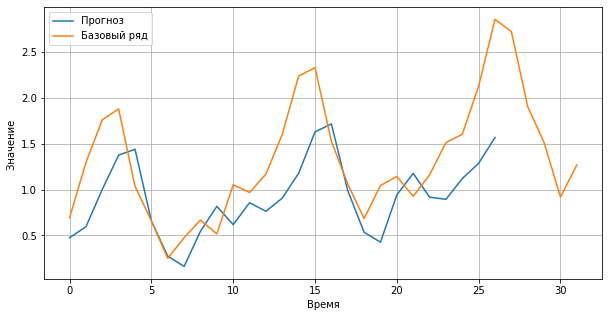

In [64]:
predtest = model.predict(dataset_test).flatten()

plt.figure(figsize=(10,5))
plt.grid('on')
plt.plot(predtest, 
         label='Прогноз')
plt.plot(np.array(ytest), 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

In [65]:
xLen = 12

dataset_train, dataset_test = create_dataset(df['Passengers'], xLen)

In [66]:
model = Sequential()

model.add(LSTM(64, input_shape = (xLen, 1), return_sequences="True"))

model.add(Flatten())                          
model.add(Dense(32, activation="linear"))      

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_test,
    callbacks=[callbaсk, tensorboard_callback],
    verbose=0)

loss_2, score_2 = model.evaluate(dataset_test, verbose=0)


In [67]:
xLen = 6

dataset_train, dataset_test = create_dataset(df['Passengers'], xLen)

In [68]:
model = Sequential()

model.add(LSTM(64, input_shape = (xLen, 1), return_sequences="True"))
model.add(LSTM(64, return_sequences="True"))

model.add(Flatten())                          
model.add(Dense(32, activation="linear"))      

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_test,
    callbacks=[callbaсk, tensorboard_callback],
    verbose=0)

loss_3, score_3 = model.evaluate(dataset_test, verbose=0)

In [69]:
xLen = 6

dataset_train, dataset_test = create_dataset(df['Passengers'], xLen)

In [70]:
model = Sequential()

model.add(LSTM(256, input_shape = (xLen, 1), return_sequences="True"))

model.add(Flatten())                          
model.add(Dense(32, activation="linear"))      

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_test,
    callbacks=[callbaсk, tensorboard_callback],
    verbose=0)

loss_4, score_4 = model.evaluate(dataset_test, verbose=0)

In [71]:
pd.DataFrame({'loss': [loss_1, loss_2, loss_3, loss_4], 'MAE': [score_1, score_2, score_3, score_4]})

,loss,MAE
0,0.289441,0.434329
1,0.080685,0.228890
2,0.891470,0.743371
3,0.242830,0.406836


Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

Модель хорошо предсказывает количество пассажиров. Наиболая проблема возникает в пиковх значениях. Наибольшее улучшение дала увеличение число прошлых результатов в модели. Так же помогло увеличение числа нейронов. Добавление LSTM слоя ухудшило результат.